In [ ]:
!pip install spectral 
!pip install rasterio 

In [ ]:
#Bibliotecas
import matplotlib.pyplot as plt
from spectral import imshow
import numpy as np
import rasterio as rio 
from skimage.exposure import match_histograms 
# exposure é um módulo só para manipulação de histograma 


In [ ]:
# leitura das imagens 
a1 = rio.open('/content/a1_b08.tif')
a2 = rio.open('/content/a2_b08.tif')

In [ ]:
# transformando em array
imagem = a1.read(1)
referencia = a2.read(1)


In [ ]:
# profile resgata os metadados da imagem já que vão se perder ao virar array
metadata = a1.profile 


In [ ]:
# Aplicando o método de homogeneizacao
homogeneizacao = match_histograms(imagem, referencia)

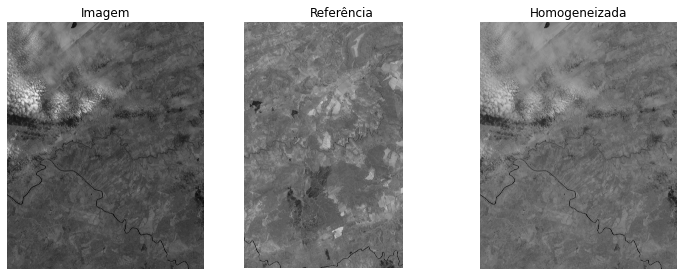

In [ ]:
# Visulização
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (12,8), sharex = True, sharey=True)

axis1.imshow(imagem, cmap='Greys_r')
axis1.set_title('Imagem')
axis1.set_axis_off()

axis2.imshow(referencia, cmap='Greys_r')
axis2.set_title('Referência')
axis2.set_axis_off()

axis3.imshow(homogeneizacao, cmap='Greys_r')
axis3.set_title('Homogeneizada')
axis3.set_axis_off()

plt.show()

In [ ]:
# salvando resultado 
with rio.open ('match.tif', 'w', **metadata) as src: 
  src.write(homogeneizacao,1)